In [ ]:
#import tensorflow as tf
import numpy as  np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler


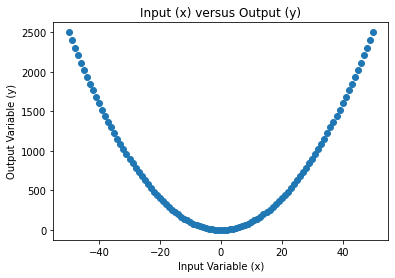

In [ ]:
# example of creating a univariate dataset with a given mapping function
from matplotlib import pyplot
# define the input data
x = [i for i in range(-50,51)]
# define the output data
y = [i**2.0 for i in x]
# plot the input versus the output
pyplot.scatter(x,y)
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.show()

In [ ]:
# define the dataset
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [ ]:
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [ ]:
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [ ]:
# design the neural network model
model=keras.models.Sequential([
                               keras.layers.Dense(10,input_dim=1, activation='relu', kernel_initializer='he_uniform'),
                               keras.layers.Dense(10,activation="relu", kernel_initializer='he_uniform'),                               
                               keras.layers.Dense(1)
])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mse",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# ft the model on the training dataset
history=model.fit(x,y,epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.0099
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.0099
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.0099
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3484 - accuracy: 0.0099
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2976 - accuracy: 0.0099
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2517 - accuracy: 0.0099
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.0099
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.0099
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.0099
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.0099
Epoch 11/500
4/4 [===========

In [ ]:
# make predictions for the input data
yhat=model.predict(x)

In [ ]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

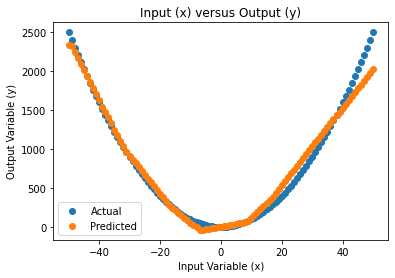

In [ ]:
# plot x vs yhat
pyplot.scatter(x_plot,y_plot, label='Actual')
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()